# Configuring the model, running g-tools and output files and infos

This tutorial shows how to configure the model and how to run Fermipy-LAT g-tools with Fermipy.
Many parts of this tutorial are taken directly from the documentation page of Fermipy: [fermipy.readthedocs](http://fermipy.readthedocs.io/en/latest/). 
I suggest to visit it to find further informations.

# Configuring the model

The model can be configured with a configuration file or directly running Fermipy with your script.

The configuration file defines the data selection and analysis parameters. The configuration file has a hierarchical structure that groups parameters into dictionaries that are keyed to a section name (data, binning, etc.). 

When creating a class instance, the configuration is initialized by passing either a configuration dictionary or configuration file path to the class constructor. 
Keyword arguments can be passed to the constructor to override configuration parameters in the input dictionary. 
In the following example the config dictionary defines values for the parameters emin and emax. By passing a dictionary for the selection keyword argument, the value of emax in the keyword argument (10000) overrides the value of emax in the input dictionary.

The configuration file can be created also with a yaml file.
Below I report a sample of configuration applied for an analysis of the SMC:

The configuration file has the same structure as the configuration dictionary such that one can read/write configurations using the load/dump methods of the yaml module:

DATA

The data section defines the input data files for the analysis (FT1, FT2, and livetime cube). 
evfile and scfile can either be individual files or group of files. The optional ltcube option can be used to choose a pre-generated livetime cube. 
If ltcube is null a livetime cube will be generated at runtime with gtltcube.

Below an example of the data part:

The options for the data component are the following:
* cacheft1: Cache FT1 files when performing binned analysis. If false then only the counts cube is retained.
* evfile: Path to FT1 file or list of FT1 files.
* ltcube: Path to livetime cube. If none a livetime cube will be generated with gtmktime.
* scfile: Path to FT2 (spacecraft) file.

BINNING

Options in the binning section control the spatial and spectral binning of the data. 

The roiwidth is the ROI width, npix specifies the number of pixels, binsz indicates the pixel size, binsperdec is the number of energy bins per decade and projtype is the type of projection and can be WCS and HEALPIX.

Other options are: 
* coordsys: for the coordinate system Galactic or Celestial (CEL or GAL), 
* hpx_order: is the healpix order, hpx_ordering_scheme is the HEALPix Ordering Scheme, 
* proj: is the Spatial projection for WCS mode, Width of the ROI in degrees. 
* roiwidth: is the number of pixels in each spatial dimension will be set from roiwidth / binsz (rounded up).

COMPONENTS

The components section can be used to define analysis configurations for independent subselections of the data. Each subselection will have its own binned likelihood instance that is combined in a global likelihood function for the ROI (implemented with the SummedLikelihood class in pyLikelihood). The components section is optional and when set to null (the default) only a single likelihood component will be created with the parameters of the root analysis configuration.

The component section is defined as a list of dictionaries where each element sets analysis parameters for a different subcomponent of the analysis. The component configurations follow the same structure and accept the same parameters as the root analysis configuration. Parameters not defined in a given element will default to the values set in the root analysis configuration.

The following example illustrates how to define a Front/Back analysis with two components. Files associated to each component will be given a suffix according to their order in the list (e.g. file_00.fits, file_01.fits, etc.).

The following example illustrates how to define an analysis divided in four components. Each of them has a different zmax and uses a different evtype and isotropic template.

EXTENSION

The options in extension control the default behavior of the extension method. For more information about using this method see the Extension Fitting page. The main options are the following:
* fit_ebin: Perform a fit for the angular extension in each analysis energy bin.
* fit_position: Perform a simultaneous fit to the source position and extension.
* fix_shape: Fix spectral shape parameters of the source of interest. If True then only the normalization parameter will be fit.
* free_background: Leave background parameters free when performing the fit. If True then any parameters that are currently free in the model will be fit simultaneously with the source of interest.
* free_radius: Free normalizations of background sources within this angular distance in degrees from the source of interest. If None then no sources will be freed.
* sqrt_ts_threshold: Threshold on sqrt(TS_ext) that will be applied when update is True. If None then nothreshold is applied.
* width: Sequence of values in degrees for the likelihood scan over spatial extension (68% containment radius). If this argument is None then the scan points will be determined from width_min/width_max/width_nstep.
* width_max: Maximum value in degrees for the likelihood scan over spatial extent.
* width_min: Minimum value in degrees for the likelihood scan over spatial extent.
* width_nstep: Number of scan points between width_min and width_max. Scan points will be spaced evenly on a logarithmic scale between width_min and width_max.

There is a notebook dedicated to this analysis.

FILEIO

The fileio section collects options related to file bookkeeping. The outdir option sets the root directory of the analysis instance where all output files will be written. If outdir is null then the output directory will be automatically set to the directory in which the configuration file is located. Enabling the usescratch option will stage all output data files to a temporary scratch directory created under scratchdir.

Sample fileio Configuration

The options for the fileio are the following:
* logfile: Path to log file. If None then log will be written to fermipy.log.
* outdir: Path of the output directory. If none this will default to the directory containing the configuration file.
* outdir_regex: Stage files to the output directory that match at least one of the regular expressions in this list. This option only takes effect when usescratch is True.
* savefits: Save intermediate FITS files.
* scratchdir: Path to the scratch directory. If usescratch is True then a temporary working directory will be created under this directory.
* usescratch: Run analysis in a temporary working directory under scratchdir.
* workdir: Path to the working directory.
* workdir_regex: Stage files to the working directory that match at least one of the regular expressions in this list. This option only takes effect when usescratch is True.

GTLIKE

Options in the gtlike section control the setup of the likelihood analysis include the IRF name (irfs).

A subsample of options for the gtlike section is listed below:
* edisp: Enable the correction for energy dispersion.
* edisp_disable: Provide a list of sources for which the edisp correction should be disabled.
* use_external_srcmap: Use an external precomputed source map file.
* use_scaled_srcmap: Generate source map by scaling an external srcmap file.
* wmap: Likelihood weights map.

The Likelihood wights map is created and used in order to account for example for the uncertainty in the interstellar emission.

MODEL

The model section collects options that control the inclusion of point-source and diffuse components in the model. galdiff and isodiff set the templates for the Galactic IEM and isotropic diffuse respectively. catalogs defines a list of catalogs that will be merged to form a master analysis catalog from which sources will be drawn. Valid entries in this list can be FITS files or XML model files. sources can be used to insert additional point-source or extended components beyond those defined in the master catalog. src_radius and src_roiwidth set the maximum distance from the ROI center at which sources in the master catalog will be included in the ROI model.

Sample for the Model section:

In the sample above the official IEM and isotropic template are used together with the 3FGL catalog given with a fits file and by an additional catalog given with an xml file following the notation of the Fermi Science Tools [fermi.fssc.spectralmodel](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/xml_model_defs.html#xmlModelDefinitions).
Then two sources named as SourceA and SourceB are added.

To define two or more galactic diffuse components you can optionally define the galdiff and isodiff parameters as lists. A separate component will be generated for each element in the list with the name galdiffXX or isodiffXX where XX is an integer position in the list.

To explicitly set the name of a component you can define any element as a dictionary containing name and file fields:

The list of sources for inclusion in the ROI model is set by defining a list of catalogs with the catalogs parameter. Catalog files can be in either XML or FITS format. Sources from the catalogs in this list that satisfy either the src_roiwidth or src_radius selections are added to the ROI model. If a source is defined in multiple catalogs the source definition from the last file in the catalogs list takes precedence.

Fermipy supports four spatial models which are defined with the SpatialModel property:

* PointSource : A point source (SkyDirFunction).
* RadialGaussian : A symmetric 2D Gaussian with width parameter ‘Sigma’.
* RadialDisk : A symmetric 2D Disk with radius ‘Radius’.
* SpatialMap : An arbitrary 2D shape with morphology defined by a FITS template.

The spatial extension of RadialDisk and RadialGaussian can be controlled with the SpatialWidth parameter which sets the 68% containment radius in degrees. Note for ST releases prior to 11-01-01, RadialDisk and RadialGaussian sources will be represented with the SpatialMap type.

OPTIMIZER

This section provides informations for the setup used for the optimization. The list of options are the following:
* init_lambda: Initial value of damping parameter for step size calculation when using the NEWTON fitter. A value of zero disables damping.
* max_iter: Maximum number of iterations for the Newtons method fitter.
* min_fit_quality: Set the minimum fit quality.
* optimizer: Set the optimization algorithm to use when maximizing the likelihood function.
* retries: Set the number of times to retry the fit when the fit quality is less than min_fit_quality.
* tol: Set the optimizer tolerance.
* verbosity

PLOTTING

This section selects the options to be used to make the plots:
* cmap: Set the colormap for 2D plots. Default magma
* cmap_resid: Set the colormap for 2D residual plots.
* figsize: Set the default figure size.
* format: format of images
* interactive: Enable interactive mode. If True then plots will be drawn after each plotting command.
* label_ts_threshold: TS threshold for labeling sources in sky maps. If None then no sources will be labeled.

SELECTION

The selection section collects parameters related to the data selection and target definition. The majority of the parameters in this section are arguments to gtselect and gtmktime. The ROI center can be set with the target parameter by providing the name of a source defined in one of the input catalogs (defined in the model section). Alternatively the ROI center can be defined by giving explicit sky coordinates with ra and dec or glon and glat.

A sample of options for this section are the following:
* emax/emin: Maximum/Minimum Energy (MeV)
* evclass: Event class selection.
* evtype: Event type selection.
* filter: Filter string for gtmktime selection.
* logemax/logemin: Maximum/Minimum Energy (log10(MeV))
* phasemax/phasemin: Maximum/Minimum pulsar phase
* radius: Radius of data selection. If none this will be automatically set from the ROI size.
* target: Choose an object on which to center the ROI. This option takes precendence over ra/dec or glon/glat.
* tmax/tmin: Maximum/Minimum time (MET).
* zmax: Maximum zenith angle.

# Running g-tools

First of all you need to load the configuration file, create the object gta and run the tool gta.setup that implements the ST gtselect, gtmktime, gtbin, gtexpcube, gtsrcmap tools

With the commands below we import the packages needed to run the script.

In [1]:
%matplotlib inline

import os
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter, SEDPlotter
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

Then we untar the file ../data/SMC_data.tar.gz. This will copy the config.yaml and ft1 file in the notebook directory.

In [2]:
if os.path.isfile('../data/SMC_data.tar.gz'):
    !tar xzf ../data/SMC_data.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/SMC_data.tar.gz
    !tar xzf SMC_data.tar.gz

In [3]:
gta = GTAnalysis('config.yaml')
matplotlib.interactive(True)
gta.setup()

2018-03-31 09:02:08 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.16.0+175.ge34f 
ScienceTools version ScienceTools-11-07-00
2018-03-31 09:02:11 INFO    GTAnalysis.setup(): Running setup.
2018-03-31 09:02:11 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2018-03-31 09:02:11 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2018-03-31 09:02:11 INFO    GTBinnedAnalysis.setup(): Using external LT cube.
2018-03-31 09:02:13 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
2018-03-31 09:02:13 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2018-03-31 09:02:13 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2018-03-31 09:02:13 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2018-03-31 09:02:35 INFO    GTAnalysis.setup(): Initializing source properties
2018-03-31 09:03:30 INFO    GTA

The setup() method performs the data preparation and response calculations needed for the analysis (selecting the data, creating counts and exposure maps, etc.). Depending on the data selection and binning of the analysis this will often be the slowest step in the analysis sequence. The output of setup() is cached in the analysis working directory so subsequent calls to setup() will run much faster.

The g-tools performed with gta.setup() are the following:
* gtselect: [gtselect_fssc](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtselect.txt)
* gtmktime: [gtmiktime_fssc](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtmktime.txt)
* gtbin: [gtbin_fssc](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtbin.txt)
* gtsrcmaps: [gtsrcmaps_fssc](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcmaps.txt)

In order to have a summary of the source model you can use the command:

In [4]:
gta.print_model()

2018-03-31 09:03:55 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.059  1.45e-05   2.22       nan      1434.2     
3FGL J0112.9-7506      2.572   1.172  1.31e-06   2.17       nan       120.0     
3FGL J0023.9-7203      2.662   0.714   9.3e-06   2.65       nan      1675.8     
3FGL J0029.1-7045      3.008   0.506  2.49e-06   2.28       nan       269.9     
3FGL J0021.6-6835      5.122   1.859  5.27e-07   2.65       nan        84.0     
3FGL J2351.9-7601      5.495   1.027  3.74e-06   1.69       nan       117.5     
3FGL J2338.7-7401      5.777   0.677  4.38e-06   1.89       nan       213.2     
3FGL J0146.4-6746      6.423   0.420  1.03e-06   2.39       nan       123.7     
3FGL J2336.5-7620      6.454   0.557  1.66e-06   2.33       nan       186.9     
3FGL J0002.0-6722      7.153   0.483  2.07e-06   1.95 

The table above contains:
* sourcename as given in the catalog
* offset from the center of the roi. Sources are ranked with respect to this parameter
* normalization of the SED
* energy flux of the source
* index of the SED with a PowerLaw SED
* Test Statistics
* npred is the number of sources associated to the source
* free column that tells if the SED parameter of the sources are free (if the column is filled with an asterix) or fixed without no asterix.

# Source dictionary

First of all, let's make a fit using gta.fit tool.
Source fitting with fermipy is generally performed with the optimize and fit methods. fit is a wrapper on the pyLikelihood fit method and performs a likelihood fit of all free parameters of the model. This method can be used to manually optimize of the model by calling it after freeing one or more source parameters.

In [5]:
gta.free_sources()
fitresult=gta.fit()

2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0059.0-7242e    : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0112.9-7506     : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0023.9-7203     : ['norm', 'alpha', 'beta']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0029.1-7045     : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0021.6-6835     : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2351.9-7601     : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2338.7-7401     : ['Prefactor', 'Index']
2018-03-31 09:04:41 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0146.4-6746     : ['Prefactor', 'Index']
2018-

In [6]:
gta.print_model()

2018-03-31 09:04:57 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.12       140.7    *
3FGL J0023.9-7203      2.662   0.590  9.68e-06   2.70   4889.10      1771.0    *
3FGL J0029.1-7045      3.008   0.746   3.1e-06   2.38     89.09       378.7    *
3FGL J0021.6-6835      5.122   2.072  2.11e-07   3.26     10.91        46.4    *
3FGL J2351.9-7601      5.495   1.429  2.81e-06   2.04    237.29       198.5    *
3FGL J2338.7-7401      5.777   0.574  2.82e-06   2.01    257.48       179.2    *
3FGL J0146.4-6746      6.423   0.529  1.65e-06   2.28    192.10       170.3    *
3FGL J2336.5-7620      6.454   0.449  1.28e-06   2.35    119.61       147.9    *
3FGL J0002.0-6722      7.153   0.395   1.7e-06   1.94 

Now you see that the ts column is filled and the free column has all asterix because we have freed the sources.

Fermipy gives the possibility to access many informations on the sources in the model.
Below a few examples.

NAME AND CHARACTERISTICS OF THE SOURCE

In [8]:
print gta.roi.sources[0]['name'] #name of the source
print gta.roi.sources[0]['Source_Name'] #name of the source
print gta.roi.sources[0]['SpatialModel'] #spatial model
print gta.roi.sources[0]['SpatialWidth'] #spatial size parameter
print gta.roi.sources[0]['SpatialType'] #spatial size parameter
print gta.roi.sources[0]['SourceType'] #Source type
print gta.roi.sources[0]['SpectrumType'] #Spectrum type string
print gta.roi.sources[0]['Spatial_Filename'] #Path to spatial template
print gta.roi.sources[0]['Spectrum_Filename'] #Path to the SED source template
print gta.roi.sources[0]['correlation'] #Dictionary of correlation coefficients.
print gta.roi.sources[0]['model_counts'] #Vector of predicted counts for this source

3FGL J0059.0-7242e
3FGL J0059.0-7242e
SpatialMap
None
SpatialMap
DiffuseSource
PowerLaw
$FERMIPY_DATA_DIR/catalogs/Extended_archive_v15/Templates/SMC.fits
None
{'3FGL J2336.5-7620': 0.021540975517969452, '3FGL J0029.1-7045': -0.018737972377049942, 'isodiff': -0.011270554190343823, 'galdiff': -0.16130718991869766, '3FGL J2338.7-7401': 0.01187470654461815, '3FGL J0059.0-7242e': 0.9999999999999998, '3FGL J0112.9-7506': -0.010991866042965983, '3FGL J0146.4-6746': 0.01590697189126327, '3FGL J0023.9-7203': -0.02136376358912324, '3FGL J0021.6-6835': 0.01579921758235634, '3FGL J0002.0-6722': 0.011830993863816544, '3FGL J2351.9-7601': 0.00401017952234348}
[4.95790377e+02 3.41435355e+02 2.31934703e+02 1.55836591e+02
 1.03590847e+02 6.85066795e+01 4.54694907e+01 3.03664598e+01
 2.00853639e+01 1.32773079e+01 8.77338782e+00 5.83038311e+00
 3.90279960e+00 2.59778026e+00 1.71628875e+00 1.12902221e+00
 7.43126007e-01 4.87775565e-01 3.21625630e-01 2.11836077e-01
 1.38999521e-01 8.97531536e-02]


CHARACTERISTICS OF THE POSITION OF THE SOURCE

In [9]:
print gta.roi.sources[0]['ra'] #ra
print gta.roi.sources[0]['dec'] #dec
print gta.roi.sources[0]['glon'] #glon
print gta.roi.sources[0]['glat'] #glat
print gta.roi.sources[0]['ra_err'] #error for ra
print gta.roi.sources[0]['dec_err'] #error for dec
print gta.roi.sources[0]['glon_err'] #error for glon
print gta.roi.sources[0]['glat_err'] #error for glat
print gta.roi.sources[0]['pos_err'] #error for the position in deg
print gta.roi.sources[0]['pos_r68'] #68% CL error for the position
print gta.roi.sources[0]['pos_r95'] #95% CL error for the position
print gta.roi.sources[0]['pos_r99'] #99% CL error for the position
print gta.roi.sources[0]['pos_err_semimajor'] #1-sigma uncertainty (deg) along major axis of uncertainty ellipse.
print gta.roi.sources[0]['pos_err_semiminor'] #1-sigma uncertainty (deg) along minor axis of uncertainty ellipse.
print gta.roi.sources[0]['offset_ra'] #Right ascension offset from ROI center in local celestial projection (deg).
print gta.roi.sources[0]['offset_dec'] #Declination offset from ROI center in local celestial projection (deg).
print gta.roi.sources[0]['offset_glon'] #Galactic longitude offset from ROI center in local galactic projection (deg).
print gta.roi.sources[0]['offset_glat'] #Galactic latitude offset from ROI center in local galactic projection (deg).
print gta.roi.sources[0]['offset'] #Angular offset from ROI center (deg).

14.75
-72.7
302.14493
-44.4167
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-0.07331403829880656
0.04939684436004943
0.0750319866158955
-0.046748398465821905
0.0884039


The error for the position is nan because we have not calculated yet the relocalization. 
Let's run the localization for a source with gta.localize tool.

In [10]:
gta.free_sources(free=True)
gta.print_model()
gta.free_sources(skydir=gta.roi[gta.roi.sources[2].name].skydir,distance=[3.0],free=True)
gta.print_model()
localsmc = gta.localize(gta.roi.sources[2].name, update=True, make_plots=True)
gta.print_model()

2018-03-31 09:06:10 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.12       140.7    *
3FGL J0023.9-7203      2.662   0.590  9.68e-06   2.70   4889.10      1771.0    *
3FGL J0029.1-7045      3.008   0.746   3.1e-06   2.38     89.09       378.7    *
3FGL J0021.6-6835      5.122   2.072  2.11e-07   3.26     10.91        46.4    *
3FGL J2351.9-7601      5.495   1.429  2.81e-06   2.04    237.29       198.5    *
3FGL J2338.7-7401      5.777   0.574  2.82e-06   2.01    257.48       179.2    *
3FGL J0146.4-6746      6.423   0.529  1.65e-06   2.28    192.10       170.3    *
3FGL J2336.5-7620      6.454   0.449  1.28e-06   2.35    119.61       147.9    *
3FGL J0002.0-6722      7.153   0.395   1.7e-06   1.94 

Using the option make_plots=True a few control plots are created like 3fgl_j0023.9-7203_localize_peak.png with the result for the likelihood analysis for the besy fit position and error for the position.

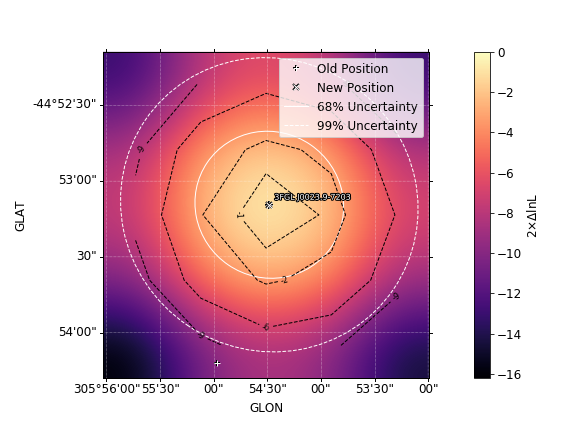

In [13]:
Image(filename='3fgl_j0023.9-7203_localize_peak.png') 

In [14]:
print gta.roi.sources[2]['ra'] #ra
print gta.roi.sources[2]['dec'] #dec
print gta.roi.sources[2]['glon'] #glon
print gta.roi.sources[2]['glat'] #glat
print gta.roi.sources[2]['ra_err'] #error for ra
print gta.roi.sources[2]['dec_err'] #error for dec
print gta.roi.sources[2]['glon_err'] #error for glon
print gta.roi.sources[2]['glat_err'] #error for glat
print gta.roi.sources[2]['pos_err'] #error for the position in deg
print gta.roi.sources[2]['pos_r68'] #68% CL error for the position
print gta.roi.sources[2]['pos_r95'] #95% CL error for the position
print gta.roi.sources[2]['pos_r99'] #99% CL error for the position
print gta.roi.sources[2]['pos_err_semimajor'] #1-sigma uncertainty (deg) along major axis of uncertainty ellipse.
print gta.roi.sources[2]['pos_err_semiminor'] #1-sigma uncertainty (deg) along minor axis of uncertainty ellipse.
print gta.roi.sources[2]['offset_ra'] #Right ascension offset from ROI center in local celestial projection (deg).
print gta.roi.sources[2]['offset_dec'] #Declination offset from ROI center in local celestial projection (deg).
print gta.roi.sources[2]['offset_glon'] #Galactic longitude offset from ROI center in local galactic projection (deg).
print gta.roi.sources[2]['offset_glat'] #Galactic latitude offset from ROI center in local galactic projection (deg).
print gta.roi.sources[2]['offset'] #Angular offset from ROI center (deg).

5.991891558666937
-72.08324039663697
305.90801515198206
-44.88593302102324
0.005397242484279103
0.005337532530487048
0.005397242484279103
0.005337532530487048
0.005366221368316228
0.008138277648229967
0.013133545877823873
0.016285398847939087
0.005448724558888491
0.005284967419907161
2.609705201380567
0.48092218927044694
-2.5908516158641124
-0.573805547525784
2.6537356812


SED PARAMETERS FLUX AND SCAN OF FLUX

In [15]:
print gta.roi.sources[0]['param_names'] #Names of spectral parameters.
print gta.roi.sources[0]['param_values'] #Spectral parameter values.
print gta.roi.sources[0]['param_errors'] #Spectral parameters errors.
print gta.roi.sources[0]['ts'] #Source test statistic.
print gta.roi.sources[0]['loglike'] #Log-likelihood of the model evaluated at the best-fit normalization of the source.
print gta.roi.sources[0]['flux_scan'] #Flux values for scan of source normalization.
print gta.roi.sources[0]['norm_scan'] #Normalization parameters values for scan of source normalization.
print gta.roi.sources[0]['npred'] #Number of predicted counts from this source integrated over the analysis energy range.
print gta.roi.sources[0]['flux'] #Photon flux (cm−2 s−1) integrated over analysis energy range
print gta.roi.sources[0]['flux_err'] #Photon flux uncertainty (cm−2 s−1) integrated over analysis energy range
print gta.roi.sources[0]['flux_ul95'] #95% CL upper limit on the photon Differential photon flux (cm−2 s−1 MeV−1tegrated over analysis energy range
print gta.roi.sources[0]['dnde'] #Differential photon flux (cm−2 s−1 MeV−1) evaluated at the pivot energy.

['Prefactor' 'Index' 'Scale' '' '' '' '' '' '' '']
[ 1.51191261e-11 -2.46682153e+00  6.65532043e+02             nan
             nan             nan             nan             nan
             nan             nan]
[1.25024392e-12 6.17596151e-02            nan            nan
            nan            nan            nan            nan
            nan            nan]
753.08940408
-77883.0461087
[0.00000000e+00 3.45304615e-09 3.49502174e-09 3.53699734e-09
 3.57897294e-09 3.62094854e-09 3.66292414e-09 3.70489974e-09
 3.74687534e-09 3.78885093e-09 3.83082653e-09 3.87280213e-09
 3.91477773e-09 3.95675333e-09 3.99872893e-09 4.04070453e-09
 4.08268013e-09 4.12465572e-09 4.16663132e-09 4.20860692e-09]
[0.         1.38385295 1.40067521 1.41749748 1.43431974 1.45114201
 1.46796427 1.48478654 1.5016088  1.51843106 1.53525333 1.55207559
 1.56889786 1.58572012 1.60254239 1.61936465 1.63618692 1.65300918
 1.66983145 1.68665371]
1532.23595176
3.77258581354e-09
1.6566462673e-10
4.03860906082e-09
9.185

2018-03-31 09:09:31 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/model_test_00.xml...
2018-03-31 09:09:31 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/model_test.fits...
2018-03-31 09:09:32 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-03-31 09:09:34 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/model_test.npy...


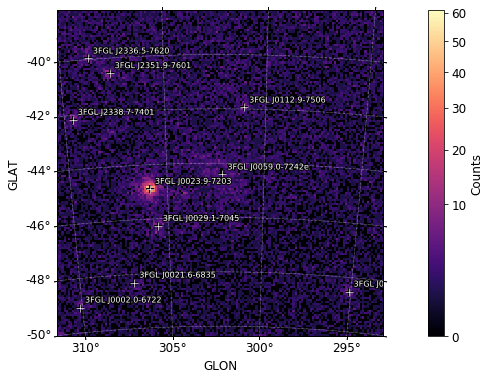

In [16]:
gta.write_roi('model_test',make_plots=True,save_model_map=True)

# Customizing your model

As we saw before you can customize your model directly in the config.yaml file.
However, sometimes you want to change something in your model directly in your Python script.

You can free or fix sources using gta.free_sources.
First let's fix the SED parameter of all the sources.

In [17]:
gta.free_sources(free=False)
gta.print_model()

2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0059.0-7242e    : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0112.9-7506     : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0023.9-7203     : ['norm', 'alpha', 'beta']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0029.1-7045     : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0021.6-6835     : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2351.9-7601     : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2338.7-7401     : ['Prefactor', 'Index']
2018-03-31 09:10:09 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0146.4-6746     : ['Prefactor', 'Index']
2018-03-31 09

Now we free all parameters:

In [18]:
gta.free_sources(free=True)
gta.print_model()

2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0059.0-7242e    : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0112.9-7506     : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0023.9-7203     : ['norm', 'alpha', 'beta']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0029.1-7045     : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0021.6-6835     : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2351.9-7601     : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2338.7-7401     : ['Prefactor', 'Index']
2018-03-31 09:10:13 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0146.4-6746     : ['Prefactor', 'Index']
2018-

Now we free all the SED parameters of sources within 3 degrees from 3FGL J0059.0-7242e:

In [19]:
gta.free_sources(free=False)
gta.free_sources(skydir=gta.roi['3FGL J0059.0-7242e'].skydir,distance=3.0)
gta.print_model()

2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0059.0-7242e    : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0112.9-7506     : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0023.9-7203     : ['norm', 'alpha', 'beta']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0029.1-7045     : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0021.6-6835     : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2351.9-7601     : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2338.7-7401     : ['Prefactor', 'Index']
2018-03-31 09:10:19 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0146.4-6746     : ['Prefactor', 'Index']
2018-03-31 09

Now we want to delete the source 3FGL J0021.6-6835:

In [20]:
gta.delete_source('3FGL J0021.6-6835')
gta.print_model()

2018-03-31 09:10:23 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0021.6-6835
2018-03-31 09:10:23 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.12       140.7    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4997.47      1770.8    *
3FGL J0029.1-7045      3.008   0.746   3.1e-06   2.38     89.09       378.7     
3FGL J2351.9-7601      5.495   1.429  2.81e-06   2.04    237.29       198.5     
3FGL J2338.7-7401      5.777   0.574  2.82e-06   2.01    257.48       179.2     
3FGL J0146.4-6746      6.423   0.529  1.65e-06   2.28    192.10       170.3     
3FGL J2336.5-7620      6.454   0.449  1.28e-06   2.35    119.61       147.9     
3FGL J0002.0-6722      7.153   0.395   1.7e-0

You can also delete all the sources as a function of the npred/ts or position using the options minmax_npred/minmax_ts/skydir options. Finally, you can delete sources in a given list using the option names.

In [21]:
help(gta.delete_sources)

Help on method delete_sources in module fermipy.gtanalysis:

delete_sources(self, cuts=None, distance=None, skydir=None, minmax_ts=None, minmax_npred=None, exclude=None, square=False, names=None) method of fermipy.gtanalysis.GTAnalysis instance
    Delete sources in the ROI model satisfying the given
    selection criteria.
    
    Parameters
    ----------
    cuts : dict
        Dictionary of [min,max] selections on source properties.
    
    distance : float
        Cut on angular distance from ``skydir``.  If None then no
        selection will be applied.
    
    skydir : `~astropy.coordinates.SkyCoord`
        Reference sky coordinate for ``distance`` selection.  If
        None then the distance selection will be applied with
        respect to the ROI center.
    
    minmax_ts : list
        Select sources that have TS in the range [min,max].  If
        either min or max are None then only a lower (upper) bound
        will be applied.  If this parameter is none no selecti

In the example below we delete all the sources that have an npred=[0,500]

In [22]:
gta.delete_sources(minmax_npred=[0,500])
gta.print_model()

2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0112.9-7506
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0029.1-7045
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J2351.9-7601
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J2338.7-7401
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0146.4-6746
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J2336.5-7620
2018-03-31 09:10:36 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0002.0-6722
2018-03-31 09:10:36 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4997.47      177

We can aldo add a new source in the model using the gta.add_source function.

In [23]:
help(gta.add_source)

Help on method add_source in module fermipy.gtanalysis:

add_source(self, name, src_dict, free=None, init_source=True, save_source_maps=True, use_pylike=True, use_single_psf=False, **kwargs) method of fermipy.gtanalysis.GTAnalysis instance
    Add a source to the ROI model.  This function may be called
    either before or after `~fermipy.gtanalysis.GTAnalysis.setup`.
    
    Parameters
    ----------
    name : str
        Source name.
    
    src_dict : dict or `~fermipy.roi_model.Source` object
        Dictionary or source object defining the source properties
        (coordinates, spectral parameters, etc.).
    
    free : bool
        Initialize the source with a free normalization parameter.
    
    use_pylike : bool
        Create source maps with pyLikelihood.
    
    use_single_psf : bool 
        Use the PSF model calculated for the ROI center.  If false
        then a new model will be generated using the position of
        the source.



In the example below we add a Source called Source_PL with a PLSuperExpCutoff and pointlike and a source called Source_Gauss that is spatial extended with a PowerLaw SED and with a RadialGaussian template with an extension of 1 deg.

In [24]:
gta.add_source('Source_PL',{ 'glon' : 300., 'glat' : -46.,'SpectrumType' : 'PLSuperExpCutoff', 'Index1':-1.5, 'Index2' : 1.0,'Scale' : 1000,'Prefactor':1e-9,'SpatialModel' : 'PointSource' })
gta.add_source('Source_Gauss',{ 'glon' : 302., 'glat' : -45.,'SpectrumType' : 'PowerLaw', 'Index':2.0,'Scale' : 1000,'Prefactor':1e-9,'SpatialModel' : 'RadialGaussian', 'SpatialWidth': 1.0 })
gta.print_model()

2018-03-31 09:10:44 INFO    GTAnalysis.add_source(): Adding source Source_PL
2018-03-31 09:10:47 INFO    GTAnalysis.add_source(): Adding source Source_Gauss
2018-03-31 09:11:00 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
Source_Gauss           0.655   1.000   0.00621   2.00       nan    410827.7    *
Source_PL              2.274   1.000   0.00319   4.00       nan    471919.8    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4997.47      1770.8    *
isodiff                  ---   0.913    0.0286   2.12   1145.04      8289.4    *
galdiff                  ---   0.944     0.122  -0.02   5109.11     17185.3    *



Now I load the model saved into model_test to have back the intial model.

In [25]:
gta.load_roi('model_test')
gta.print_model()

2018-03-31 09:11:04 INFO    GTAnalysis.load_roi(): Loading ROI file: /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/model_test.npy
2018-03-31 09:11:04 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2018-03-31 09:11:23 INFO    GTAnalysis.load_roi(): Finished Loading ROI
2018-03-31 09:11:23 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.12       140.7    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4997.47      1770.8    *
3FGL J0029.1-7045      3.008   0.746   3.1e-06   2.38     89.09       378.7    *
3FGL J0021.6-6835      5.122   2.072  2.11e-07   3.26     10.91        46.4    *
3FGL J2351.9-7601      5.495   1.429  2.81e-

It is also possible to modify the SED parameters using the functions gta.set_norm, gta.set_parameter, gta.set_parameter_bounds, gta.set_parameter_error .

In [26]:
help(gta.set_norm)
help(gta.set_parameter)

Help on method set_norm in module fermipy.gtanalysis:

set_norm(self, name, value, update_source=True) method of fermipy.gtanalysis.GTAnalysis instance

Help on method set_parameter in module fermipy.gtanalysis:

set_parameter(self, name, par, value, true_value=True, scale=None, bounds=None, error=None, update_source=True) method of fermipy.gtanalysis.GTAnalysis instance
    Update the value of a parameter.  Parameter bounds will
    automatically be adjusted to encompass the new parameter
    value.
    
    Parameters
    ----------
    
    name : str
        Source name.
    
    par : str
        Parameter name.
    
    value : float
        Parameter value.  By default this argument should be the
        unscaled (True) parameter value.
    
    scale : float
        Parameter scale (optional).  Value argument is interpreted
        with respect to the scale parameter if it is provided.
    
    error : float
        Parameter error (optional).  By default this argument should b

In [27]:
print gta.roi['3FGL J0059.0-7242e']['param_names']
print gta.roi['3FGL J0059.0-7242e']['param_values']
print gta.roi['3FGL J0059.0-7242e']['param_errors']

['Prefactor' 'Index' 'Scale' '' '' '' '' '' '' '']
[ 1.51191261e-11 -2.46682153e+00  6.65532043e+02             nan
             nan             nan             nan             nan
             nan             nan]
[ 1.25024392e-12 -6.17596151e-02             nan             nan
             nan             nan             nan             nan
             nan             nan]


In the example below we fix the normalization to 1e-11 and the slope to 2.0.

In [28]:
gta.set_norm('3FGL J0059.0-7242e',value=1.)
gta.set_parameter('3FGL J0059.0-7242e',par='Index',value=2.0)
print gta.roi['3FGL J0059.0-7242e']['param_names']
print gta.roi['3FGL J0059.0-7242e']['param_values']
print gta.roi['3FGL J0059.0-7242e']['param_errors']

/u/gl/mdimauro/kipac/software/anaconda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


['Prefactor' 'Index' 'Scale' '' '' '' '' '' '' '']
[1.00000000e-11 2.00000000e+00 6.65532043e+02            nan
            nan            nan            nan            nan
            nan            nan]
[ 0.  0. nan nan nan nan nan nan nan nan]


It is also possible to set the SED shape of a source using gta.set_source_spectrum tool.

In [30]:
help(gta.set_source_spectrum)

Help on method set_source_spectrum in module fermipy.gtanalysis:

set_source_spectrum(self, name, spectrum_type='PowerLaw', spectrum_pars=None, update_source=True) method of fermipy.gtanalysis.GTAnalysis instance
    Set the spectral model of a source.  This function can be
    used to change the spectral type of a source or modify its
    spectral parameters.  If called with
    spectrum_type='FileFunction' and spectrum_pars=None, the
    source spectrum will be replaced with a FileFunction with the
    same differential flux distribution as the original spectrum.
    
    Parameters
    ----------
    
    name : str
       Source name.
    
    spectrum_type : str
       Spectrum type (PowerLaw, etc.).
    
    spectrum_pars : dict
       Dictionary of spectral parameters (optional).
    
    update_source : bool
       Recompute all source characteristics (flux, TS, NPred)
       using the new spectral model of the source.



In [33]:
gta.load_roi('model_test')
gta.print_model()
gta.roi['3FGL J0059.0-7242e']['SpectrumType']

2018-03-31 09:14:18 INFO    GTAnalysis.load_roi(): Loading ROI file: /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/model_test.npy
2018-03-31 09:14:18 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2018-03-31 09:14:37 INFO    GTAnalysis.load_roi(): Finished Loading ROI
2018-03-31 09:14:37 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.12       140.7    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4997.47      1770.8    *
3FGL J0029.1-7045      3.008   0.746   3.1e-06   2.38     89.09       378.7    *
3FGL J0021.6-6835      5.122   2.072  2.11e-07   3.26     10.91        46.4    *
3FGL J2351.9-7601      5.495   1.429  2.81e-

'PowerLaw'

In [34]:
gta.set_source_spectrum('3FGL J0059.0-7242e',spectrum_type='LogParabola')
gta.roi['3FGL J0059.0-7242e']['SpectrumType']

'LogParabola'

In [35]:
gta.fit()

2018-03-31 09:15:23 INFO    GTAnalysis.fit(): Starting fit.
2018-03-31 09:15:38 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2018-03-31 09:15:38 INFO    GTAnalysis.fit(): LogLike:   -77883.001 DeltaLogLike:        0.000 


{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': array([[ 1.00000000e+00,  4.40010977e-01, -1.80903032e-03,
         -1.29673069e-03,  3.87817026e-03,  2.64332600e-03,
         -2.04198717e-03,  9.41038275e-03,  6.18965916e-04,
          1.18313905e-02,  2.62916494e-03,  4.12849233e-03,
          2.26000858e-03,  6.23891541e-03,  3.04105095e-03,
          5.05645412e-03,  3.00353477e-03,  4.90626867e-03,
          2.82449046e-03,  2.82031889e-03,  2.93014665e-03,
         -1.19680073e-02, -2.71265943e-02, -3.41242300e-02],
        [ 4.40010977e-01,  1.00000000e+00, -1.81621670e-03,
         -7.32754724e-04,  2.44740751e-03,  1.49292747e-03,
         -8.93745178e-04,  5.79304529e-03,  4.32350178e-03,
          1.14652827e-02,  8.09005714e-03,  3.14397563e-03,
          2.46443004e-03,  3.52454107e-03,  2.37096614e-03,
          

In [36]:
print gta.roi['3FGL J0059.0-7242e']['param_names']
print gta.roi['3FGL J0059.0-7242e']['param_values']
print gta.roi['3FGL J0059.0-7242e']['param_errors']

['norm' 'alpha' 'beta' 'Eb' '' '' '' '' '' '']
[1.51185817e-11 2.46682951e+00 0.00000000e+00 6.65532043e+02
            nan            nan            nan            nan
            nan            nan]
[1.25015869e-12 6.17598948e-02            nan            nan
            nan            nan            nan            nan
            nan            nan]


As you can see above the tool gta.set_source_spectrum has modified the SED shape from PowerLaw to LogParabola.

It is also possible to set the spatial morphology of a source using gta.set_source_morphology

In [37]:
help(gta.set_source_morphology)

Help on method set_source_morphology in module fermipy.gtanalysis:

set_source_morphology(self, name, **kwargs) method of fermipy.gtanalysis.GTAnalysis instance
    Set the spatial model of a source.
    
    Parameters
    ----------
    name : str
       Source name.
    
    spatial_model : str
       Spatial model name (PointSource, RadialGaussian, etc.).
    
    spatial_pars : dict
       Dictionary of spatial parameters (optional).
    
    use_cache : bool        
       Generate the spatial model by interpolating the cached source
       map.
    
    use_pylike : bool



In [38]:
gta.set_source_morphology(name='3FGL J0029.1-7045',spatial_model='RadialGaussian',spatial_pars={'SpatialWidth': 1.0} )

In [39]:
gta.print_model()
print gta.roi['3FGL J0029.1-7045']['SpatialType']
print gta.roi['3FGL J0029.1-7045']['SpatialWidth']

2018-03-31 09:17:12 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0059.0-7242e     0.088   1.512  1.12e-05   2.47    753.09      1532.2    *
3FGL J0112.9-7506      2.572   1.268  2.14e-06   2.00    152.13       140.7    *
3FGL J0023.9-7203      2.654   0.590  9.68e-06   2.70   4888.53      1770.7    *
3FGL J0029.1-7045      3.008   0.748   3.1e-06   2.38     89.43       379.6    *
3FGL J0021.6-6835      5.122   2.072  2.11e-07   3.26     10.91        46.4    *
3FGL J2351.9-7601      5.495   1.429  2.81e-06   2.04    237.30       198.5    *
3FGL J2338.7-7401      5.777   0.574  2.82e-06   2.01    257.49       179.2    *
3FGL J0146.4-6746      6.423   0.529  1.65e-06   2.28    192.11       170.3    *
3FGL J2336.5-7620      6.454   0.449  1.28e-06   2.35    119.62       148.0    *
3FGL J0002.0-6722      7.153   0.395   1.7e-06   1.94 

RadialGaussian
1.0
